In [736]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import os
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [737]:

print('Pillow Version:', PIL.__version__)

Pillow Version: 8.1.0


In [738]:
from PIL import Image,ImageEnhance,ImageFilter,ImageOps
image=Image.open('training/training/background/displayPanel_0_flip_blur_d3.jpg')
print(image.format)
print(image.mode)
print(image.size)
image.show()

JPEG
RGB
(64, 64)


In [739]:
#Images with no characters: label=0
#Images with Hindi characters label=1
X_train,Y_train=[],[]
BG_path=r"C:\Users\ADITYA\Desktop\AI\Dsets\NVIDIA\training\training\background"
files=os.listdir(BG_path)
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(BG_path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    im=Image.open(os.path.join(BG_path,f))
    #im=im.convert("L")
    X_train.append((im.copy()))
    Y_train.append(0)
print("Imgs: ",len(X_train))
print("tokens: ",len(Y_train))

Imgs:  4450
tokens:  4450


In [740]:
HC_path=r"C:\Users\ADITYA\Desktop\AI\Dsets\NVIDIA\training\training\hi"
files=os.listdir(HC_path)
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(HC_path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    im=Image.open(os.path.join(HC_path,f))
    #im=im.convert("L")
    X_train.append((im.copy()))
    Y_train.append(1)
print("Imgs: ",len(X_train))
print("tokens: ",len(Y_train))

Imgs:  5875
tokens:  5875


C:\Users\ADITYA\anaconda3\envs\world\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

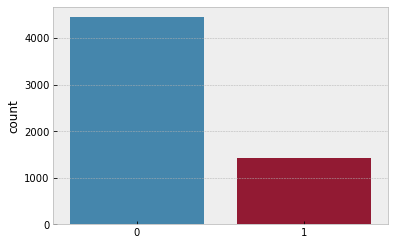

In [741]:
sns.countplot(Y_train)
#images containing characters outnumbered 4 to 1 Augmentation?

In [742]:
print(X_train[0].size)
print(X_train[0].mode)

(64, 64)
RGB


In [743]:
import tensorflow as tf
for x in X_train:
    x=(np.array(x.copy()).flatten())

In [744]:
type(X_train[0])

PIL.Image.Image

C:\Users\ADITYA\anaconda3\envs\world\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

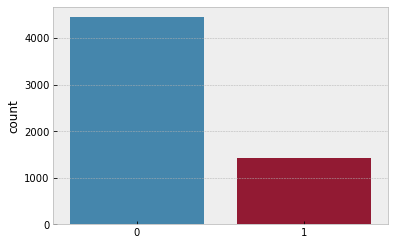

In [745]:
sns.countplot(Y_train)

In [746]:
for i in range(len(Y_train)):
    if Y_train[i]==1:
        X_train.append((X_train[i].rotate(45)))
        Y_train.append(1)

C:\Users\ADITYA\anaconda3\envs\world\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

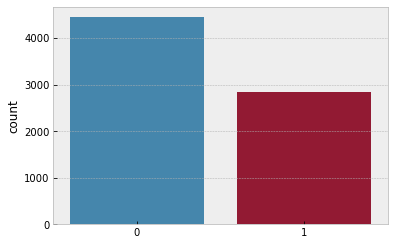

In [747]:
sns.countplot(Y_train)

In [748]:
for i in range(len(Y_train)):
    if Y_train[i]==1:
        X_train.append((X_train[i].transpose(Image.FLIP_TOP_BOTTOM)))
        Y_train.append(1)

C:\Users\ADITYA\anaconda3\envs\world\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

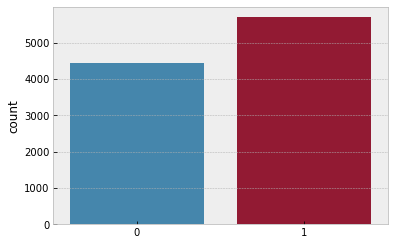

In [749]:
sns.countplot(Y_train)

In [750]:
type(X_train[0])

PIL.Image.Image

In [751]:
print(len(X_train))
print(len(Y_train))

10150
10150


In [752]:
test=X_train[1]

In [753]:
#test.show()

In [754]:
test=ImageEnhance.Sharpness(test)
test.enhance(6).show()


In [755]:
test_hi=[]
for i in range(len(Y_train)):
    if(Y_train[i]==1):
        test_hi.append(X_train[i])

In [756]:
#test_hi[0].show()

In [757]:
work_with=test_hi[0]
work_with=ImageEnhance.Sharpness(work_with)
#work_with.enhance(6).show()####Seems fine....
result=work_with.enhance(6)

In [758]:
for_bright=ImageEnhance.Brightness(result)
#for_bright.enhance(5).show()
result=for_bright.enhance(5)

In [759]:
result_grey = result.convert('L')
#result_grey.show()## Is required can c improv....

In [760]:
for i in range(len(X_train)):
    X_train[i]=ImageEnhance.Sharpness(X_train[i])
    #x.enhance(6).show()####Seems fine....
    X_train[i]=X_train[i].enhance(6)
for i in range(len(X_train)):
    X_train[i]=ImageEnhance.Brightness(X_train[i])
    #x.enhance(6).show()####Seems fine....
    X_train[i]=X_train[i].enhance(5)

In [761]:
#X_train[i].show()

In [762]:
images=[]
for x in X_train:
    x=x.convert("L")
    images.append(np.array(x.copy()))
images[0].shape

(64, 64)

In [763]:
images[0].astype('float32')/255

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [764]:
for i in range(len(images)):
    images[i]=images[i].astype('float32')/255

In [765]:
#images
train_data=images

In [766]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models,utils
import matplotlib.pyplot as plt

In [767]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [768]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)             

In [769]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [770]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, Y_train, test_size=0.15, random_state=42,shuffle=True)

In [771]:

print(len(x_train),len(y_train))
print(len(x_val),len(y_val))

8627 8627
1523 1523


In [772]:
x_train=np.array(x_train).reshape(-1, 64, 64, 1)
x_val=np.array(x_val).reshape(-1, 64, 64, 1)

In [773]:
#y_train = tf.keras.utils.to_categorical(y_train)
#y_val = tf.keras.utils.to_categorical(y_val)

In [774]:
x_train.shape

(8627, 64, 64, 1)

In [775]:
type(x_train)

numpy.ndarray

In [776]:
y_train=np.array(y_train).astype('int32')
y_val=np.array(y_val).astype('int32')
type(y_train)

numpy.ndarray

In [777]:
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)

(8627, 64, 64, 1) float32
(8627,) int32


In [778]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val))

Train on 8627 samples, validate on 1523 samples
Epoch 1/10
8627/8627 [==============================] - 3s 292us/sample - loss: 0.3232 - accuracy: 0.8606 - val_loss: 0.2000 - val_accuracy: 0.9251
Epoch 2/10
8627/8627 [==============================] - 2s 210us/sample - loss: 0.1817 - accuracy: 0.9327 - val_loss: 0.1629 - val_accuracy: 0.9383
Epoch 3/10
8627/8627 [==============================] - 2s 215us/sample - loss: 0.1544 - accuracy: 0.9426 - val_loss: 0.2465 - val_accuracy: 0.9396
Epoch 4/10
8627/8627 [==============================] - 2s 219us/sample - loss: 0.1304 - accuracy: 0.9510 - val_loss: 0.1104 - val_accuracy: 0.9560
Epoch 5/10
8627/8627 [==============================] - 2s 210us/sample - loss: 0.0962 - accuracy: 0.9644 - val_loss: 0.0905 - val_accuracy: 0.9724
Epoch 6/10
8627/8627 [==============================] - 2s 210us/sample - loss: 0.0460 - accuracy: 0.9835 - val_loss: 0.0533 - val_accuracy: 0.9816
Epoch 7/10
8627/8627 [==============================] - 2s 217us

1523/1523 - 0s - loss: 0.0182 - accuracy: 0.9967


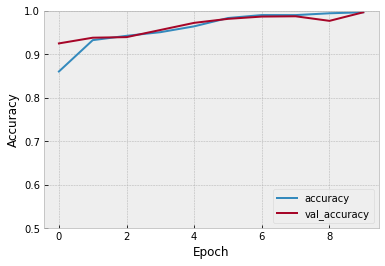

In [779]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)

In [780]:
print(test_acc)

0.996717


In [781]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [782]:
config = model.to_json()
loaded_model = tf.keras.models.model_from_json(config)

In [783]:
from sklearn.metrics import roc_curve, auc
y_pred=model.predict(x_val).ravel()

In [784]:
y_pred.shape

(1523,)

In [785]:
y_val.shape

(1523,)

In [786]:
y_pred

array([3.7671439e-03, 4.7569706e-06, 1.0000000e+00, ..., 3.3729310e-07,
       1.0982680e-03, 1.0000000e+00], dtype=float32)

In [787]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [788]:
X_test=[]
TC_path=r"C:\Users\ADITYA\Desktop\AI\Dsets\NVIDIA\test\test"
files=os.listdir(TC_path)
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(TC_path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    im=Image.open(os.path.join(TC_path,f))
    #im=im.convert("L")
    X_test.append((im.copy()))
    #Y_train.append(1)
print("Imgs: ",len(X_test))
#print("tokens: ",len(Y_train))

Imgs:  98


In [789]:
for i in range(len(X_test)):
    X_test[i]=ImageEnhance.Sharpness(X_test[i])
    #x.enhance(6).show()####Seems fine....
    X_test[i]=X_test[i].enhance(6)
for i in range(len(X_test)):
    X_test[i]=ImageEnhance.Brightness(X_test[i])
    #x.enhance(6).show()####Seems fine....
    X_test[i]=X_test[i].enhance(5)

In [790]:
test_images=[]
for x in X_test:
    x=x.convert("L")
    test_images.append(np.array(x.copy()))
test_images[0].shape

(64, 64)

In [791]:
for i in range(len(test_images)):
    test_images[i]=test_images[i].astype('float32')/255

In [792]:
test_images=np.array(test_images).reshape(-1, 64, 64, 1)

In [793]:
y_test_pred=model.predict(test_images)

In [798]:
y_test_pred

array([[1.0000000e+00],
       [2.5007965e-14],
       [1.0000000e+00],
       [3.2655056e-11],
       [1.0000000e+00],
       [4.1765791e-01],
       [1.0000000e+00],
       [3.8987582e-05],
       [9.9999714e-01],
       [1.9957742e-03],
       [1.0000000e+00],
       [2.5904060e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.3246763e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.0627092e-04],
       [8.5286396e-03],
       [8.9936628e-04],
       [5.6839088e-04],
       [9.6488907e-04],
       [2.5829519e-05],
       [4.1875802e-07],
       [3.2590136e-03],
       [1.7446626e-10],
       [2.1781844e-08],
       [1.0000000e+00],
       [5.3992677e-09],
       [1.0000000e+00],
       [4.1869088e-04],
       [9.5102650e-01],
       [1.9351020e-04],
       [1.0000000e+00],
       [8.800771

In [799]:
y_test_pred=np.floor(y_test_pred)

In [802]:
y_test_pred=y_test_pred.astype(int)

In [803]:
y_test_pred

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [808]:
y_test_pred=y_test_pred.flatten()

In [809]:
y_test_pred.shape

(98,)

In [810]:
y_test_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [813]:
names=[]
for i in range(98):
    names.append(str(i+1)+'.png')

In [814]:
names

['1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png',
 '20.png',
 '21.png',
 '22.png',
 '23.png',
 '24.png',
 '25.png',
 '26.png',
 '27.png',
 '28.png',
 '29.png',
 '30.png',
 '31.png',
 '32.png',
 '33.png',
 '34.png',
 '35.png',
 '36.png',
 '37.png',
 '38.png',
 '39.png',
 '40.png',
 '41.png',
 '42.png',
 '43.png',
 '44.png',
 '45.png',
 '46.png',
 '47.png',
 '48.png',
 '49.png',
 '50.png',
 '51.png',
 '52.png',
 '53.png',
 '54.png',
 '55.png',
 '56.png',
 '57.png',
 '58.png',
 '59.png',
 '60.png',
 '61.png',
 '62.png',
 '63.png',
 '64.png',
 '65.png',
 '66.png',
 '67.png',
 '68.png',
 '69.png',
 '70.png',
 '71.png',
 '72.png',
 '73.png',
 '74.png',
 '75.png',
 '76.png',
 '77.png',
 '78.png',
 '79.png',
 '80.png',
 '81.png',
 '82.png',
 '83.png',
 '84.png',
 '85.png',
 '86.png',
 '87.png',
 '88.png',
 '89.png',
 '90.png',
 '91.png',
 '92.png

In [834]:
y_test_pred=y_test_pred.tostring()

C:\Users\ADITYA\anaconda3\envs\world\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


In [835]:
result=dict(zip(names,y_test_pred))
result


{'1.png': 1,
 '2.png': 0,
 '3.png': 0,
 '4.png': 0,
 '5.png': 0,
 '6.png': 0,
 '7.png': 0,
 '8.png': 0,
 '9.png': 1,
 '10.png': 0,
 '11.png': 0,
 '12.png': 0,
 '13.png': 0,
 '14.png': 0,
 '15.png': 0,
 '16.png': 0,
 '17.png': 1,
 '18.png': 0,
 '19.png': 0,
 '20.png': 0,
 '21.png': 0,
 '22.png': 0,
 '23.png': 0,
 '24.png': 0,
 '25.png': 1,
 '26.png': 0,
 '27.png': 0,
 '28.png': 0,
 '29.png': 0,
 '30.png': 0,
 '31.png': 0,
 '32.png': 0,
 '33.png': 0,
 '34.png': 0,
 '35.png': 0,
 '36.png': 0,
 '37.png': 0,
 '38.png': 0,
 '39.png': 0,
 '40.png': 0,
 '41.png': 1,
 '42.png': 0,
 '43.png': 0,
 '44.png': 0,
 '45.png': 0,
 '46.png': 0,
 '47.png': 0,
 '48.png': 0,
 '49.png': 1,
 '50.png': 0,
 '51.png': 0,
 '52.png': 0,
 '53.png': 1,
 '54.png': 0,
 '55.png': 0,
 '56.png': 0,
 '57.png': 1,
 '58.png': 0,
 '59.png': 0,
 '60.png': 0,
 '61.png': 1,
 '62.png': 0,
 '63.png': 0,
 '64.png': 0,
 '65.png': 1,
 '66.png': 0,
 '67.png': 0,
 '68.png': 0,
 '69.png': 1,
 '70.png': 0,
 '71.png': 0,
 '72.png': 0,
 

In [836]:
import json
jsonStr = json.dumps(result)
print(jsonStr)

{"1.png": 1, "2.png": 0, "3.png": 0, "4.png": 0, "5.png": 0, "6.png": 0, "7.png": 0, "8.png": 0, "9.png": 1, "10.png": 0, "11.png": 0, "12.png": 0, "13.png": 0, "14.png": 0, "15.png": 0, "16.png": 0, "17.png": 1, "18.png": 0, "19.png": 0, "20.png": 0, "21.png": 0, "22.png": 0, "23.png": 0, "24.png": 0, "25.png": 1, "26.png": 0, "27.png": 0, "28.png": 0, "29.png": 0, "30.png": 0, "31.png": 0, "32.png": 0, "33.png": 0, "34.png": 0, "35.png": 0, "36.png": 0, "37.png": 0, "38.png": 0, "39.png": 0, "40.png": 0, "41.png": 1, "42.png": 0, "43.png": 0, "44.png": 0, "45.png": 0, "46.png": 0, "47.png": 0, "48.png": 0, "49.png": 1, "50.png": 0, "51.png": 0, "52.png": 0, "53.png": 1, "54.png": 0, "55.png": 0, "56.png": 0, "57.png": 1, "58.png": 0, "59.png": 0, "60.png": 0, "61.png": 1, "62.png": 0, "63.png": 0, "64.png": 0, "65.png": 1, "66.png": 0, "67.png": 0, "68.png": 0, "69.png": 1, "70.png": 0, "71.png": 0, "72.png": 0, "73.png": 1, "74.png": 0, "75.png": 0, "76.png": 0, "77.png": 0, "78.png